# Fun with topography

Get some data

In [3]:
import numpy as np
z = np.load('data/topography.npy')
nx, ny = z.shape
nx, ny

(300, 300)

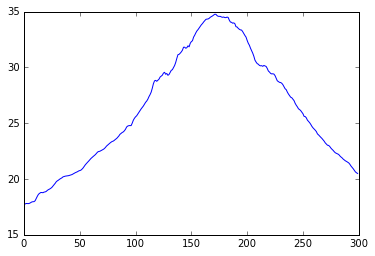

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(z[:,100])
plt.show()

# Look at the data

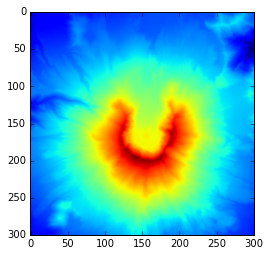

In [17]:
plt.imshow(z)
plt.show()

In [28]:
z = z[:150,:150]
nx, ny = z.shape

# Interactive visualization

In [29]:
from pythreejs import *
from IPython.display import display
try:
    from ipywidgets import HTML, Text
    from traitlets import link, dlink
except ImportError:
    from IPython.html.widgets import HTML, Text
    from IPython.utils.traitlets import link, dlink

In [41]:
surf_g = SurfaceGeometry(z=list(z[::-1].flat), 
                          width=nx,
                          height=nx,
                          width_segments=nx-1,
                          height_segments=ny-1)

surf = Mesh(geometry=surf_g, material=LambertMaterial(map=height_texture(z[::-1], 'gist_earth')))
surfgrid = SurfaceGrid(geometry=surf_g, material=LineBasicMaterial(color='white', linewidth=0.1))
hover_point = Mesh(geometry=SphereGeometry(radius=2), material=LambertMaterial(color='red'))
scene = Scene(children=[surf, 
                        #surfgrid, 
                        hover_point, 
                        AmbientLight(color=0x777777)])
c = PerspectiveCamera(position=[200,20,300], up=[0,0,1], 
                      children=[DirectionalLight(color='white', position=[3,5,1], intensity=0.75)])
click_picker = Picker(root=surf, event='dblclick')
hover_picker = Picker(root=surf, event='mousemove')
renderer = Renderer(camera=c, 
                    scene= scene,
                    width=800,
                    height=600,
                    controls=[OrbitControls(controlling=c), 
                    click_picker, hover_picker])

/Users/Evan/anaconda/lib/python3.4/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [42]:
def f(name, value):
    print("Clicked on %s"%value)
    point = Mesh(geometry=SphereGeometry(radius=1), 
                              material=LambertMaterial(color='red'),
                             position=value)
    scene.children = list(scene.children)+[point]
    
click_picker.on_trait_change(f, 'point')

link((hover_point, 'position'), (hover_picker, 'point'))

h = HTML()
def g(name, value):
    h.value="cursor point at (%.3f, %.3f, %.3f)"%tuple(value)

g(None, hover_point.position)

In [43]:
hover_picker.on_trait_change(g, 'point')
display(h)
display(renderer)